# Step 0: Set it up

In [10]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# customize the style
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = 12

# load the data
filepath = './dataset/PJME_hourly.csv'
df = pd.read_csv(filepath)

print("Now, you're ready for step one")

Now, you're ready for step one


# Step 1: Explore the data
---
To better understand the data, I need to create a graph to see the change in PJM Energy over time.

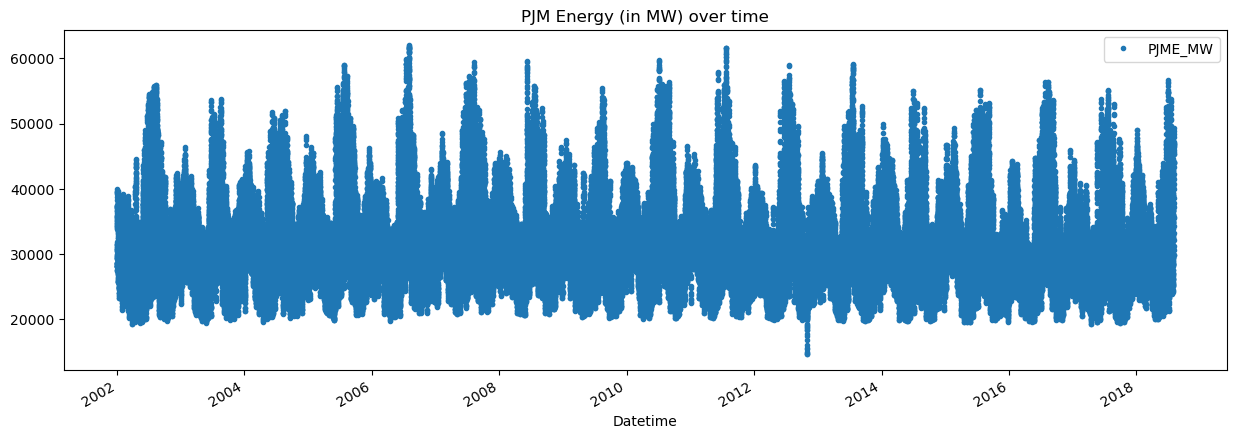

In [11]:
# turn data to datetime
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

# create the plot
df.plot(style='.',
        figsize=(15, 5),
        title='PJM Energy (in MW) over time')
plt.show()

# Step 2: Split the data
---
Everything prior to January 2015 will be our training data and keep our test data as the following dates.


In [12]:
# train / test split
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']


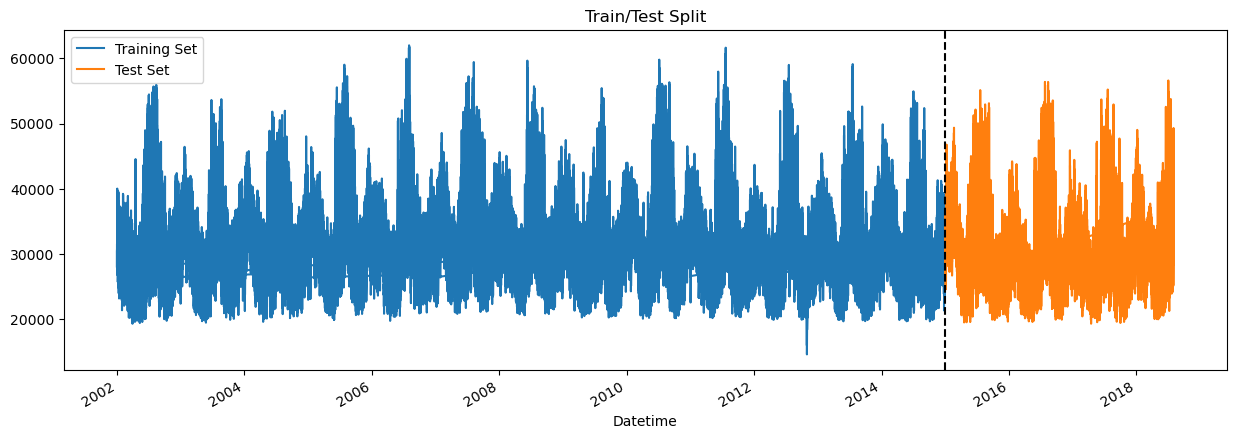

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

# Step 3: Feature Engineering
---
We're going to create some time features using the `Datetime` index. After that, we'll explore the distributions of `Hourly` and `Monthly` megawatt usage.

In [14]:
# feature creation
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    
    # Added cyclical features for hour and month
    df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
    df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
    df['month_cos'] = np.cos(2 * np.pi * df['month']/12)
    return df


print(df.columns)


Index(['PJME_MW'], dtype='object')


ValueError: Could not interpret value `hour` for `x`. An entry with this name does not appear in `data`.

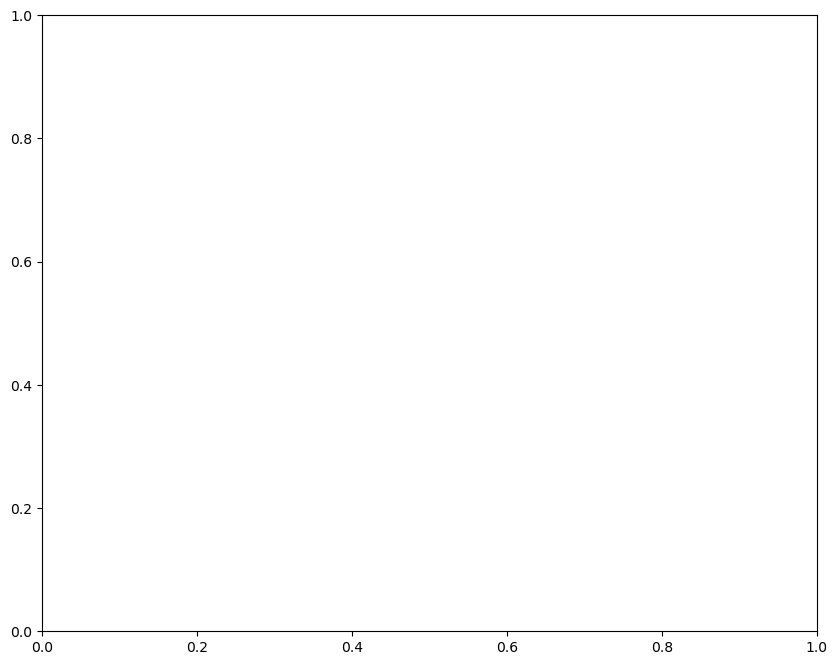

In [15]:
# visualize the hourly Megawatt
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('Energy Consumption by Hour')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Energy Consumption (MW)')
plt.show()

In [17]:
df['month'] = df['month'].astype(str)
# Convert month to string# viaualize the monthly Megawatt
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title('Energy Consumption by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Energy Consumption (MW)')
plt.show()

KeyError: 'month'